In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Mengeksplorasi data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


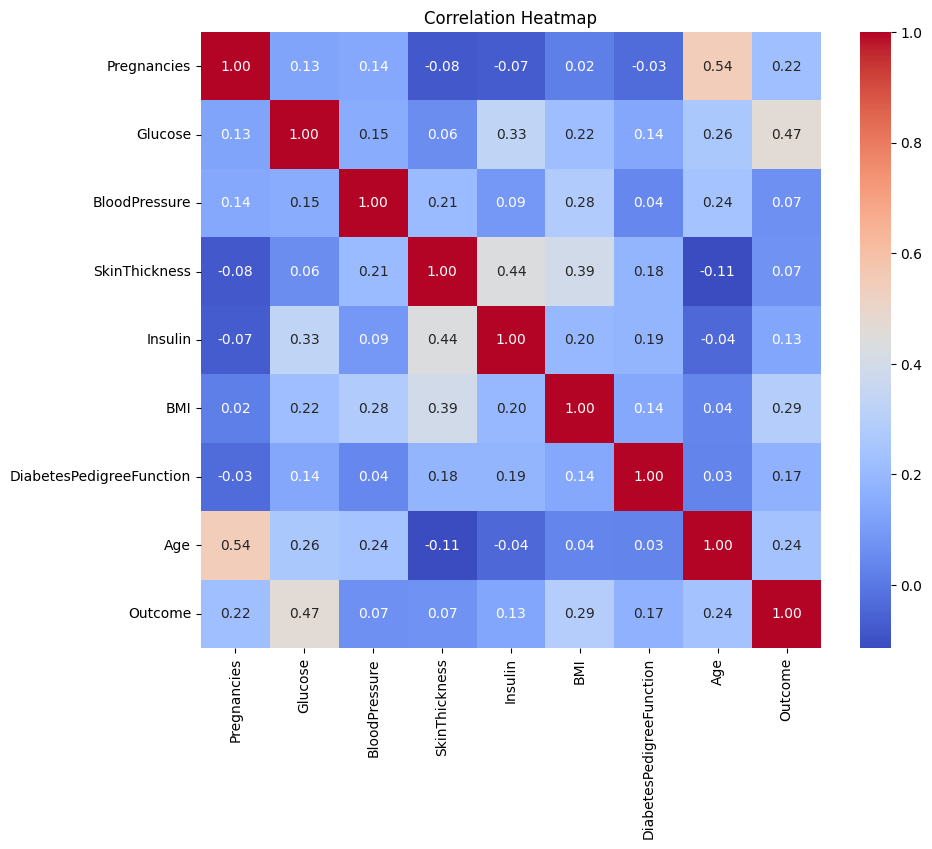

In [5]:
# 1. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25724\4294497584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='Set2')


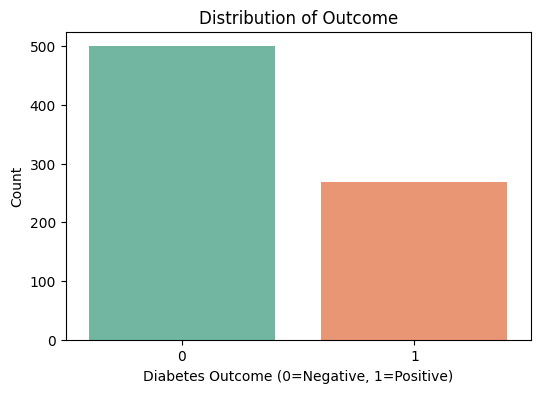

In [6]:
# 2. Distribusi Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data, palette='Set2')
plt.title("Distribution of Outcome")
plt.xlabel("Diabetes Outcome (0=Negative, 1=Positive)")
plt.ylabel("Count")
plt.show()

In [7]:
# 2. Menggunakan kolom usia dan outcome dari dataset
usia = data['Age']
outcome = data['Outcome']

# Filter data untuk masing-masing kategori
usia_bawah30_tidak_outcome = usia[(usia < 30) & (outcome == 0)]
usia_atas30_tidak_outcome = usia[(usia > 30) & (outcome == 0)]

# Hitung rata-rata usia untuk masing-masing kategori
rata2_bawah30_tidak_outcome = usia_bawah30_tidak_outcome.mean()
rata2_atas30_tidak_outcome = usia_atas30_tidak_outcome.mean()

# Cetak hasil
print(f"Rata-rata usia di bawah 30 tahun dan tidak outcome: {rata2_bawah30_tidak_outcome}")
print(f"Rata-rata usia di atas 30 tahun dan tidak outcome: {rata2_atas30_tidak_outcome}")

Rata-rata usia di bawah 30 tahun dan tidak outcome: 24.028846153846153
Rata-rata usia di atas 30 tahun dan tidak outcome: 44.20809248554913


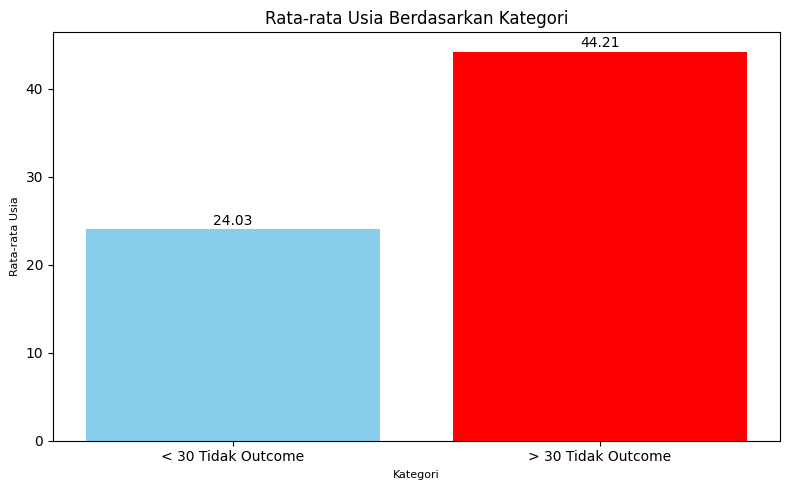

In [8]:
# Data rata-rata dari hasil perhitungan
categories = ['< 30 Tidak Outcome', '> 30 Tidak Outcome']
means = [rata2_bawah30_tidak_outcome, rata2_atas30_tidak_outcome]

# Membuat bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, means, color=['skyblue', 'red'])

# Menambahkan judul dan label
plt.title('Rata-rata Usia Berdasarkan Kategori', fontsize=12)
plt.ylabel('Rata-rata Usia', fontsize=8)
plt.xlabel('Kategori', fontsize=8)

# Menampilkan nilai rata-rata pada masing-masing batang
for i, mean in enumerate(means):
    plt.text(i, mean + 0.5, f'{mean:.2f}', ha='center', fontsize=10)

# Tampilkan grafik
plt.tight_layout()
plt.show()

In [9]:
# Mengambil kolom usia dan outcome dari dataset
usia = data['Age']
outcome = data['Outcome']

# Filter data untuk masing-masing kategori
usia_atas30_outcome = usia[(usia > 30) & (outcome == 1)]
usia_bawah30_outcome = usia[(usia < 30) & (outcome == 1)]

# Hitung rata-rata usia untuk masing-masing kategori
rata2_atas30_outcome = usia_atas30_outcome.mean()
rata2_bawah30_outcome = usia_bawah30_outcome.mean()

# Cetak hasil
print(f"Rata-rata usia di atas 30 tahun dan outcome: {rata2_atas30_outcome}")
print(f"Rata-rata usia di bawah 30 tahun dan outcome: {rata2_bawah30_outcome}")

Rata-rata usia di atas 30 tahun dan outcome: 42.825842696629216
Rata-rata usia di bawah 30 tahun dan outcome: 25.36904761904762


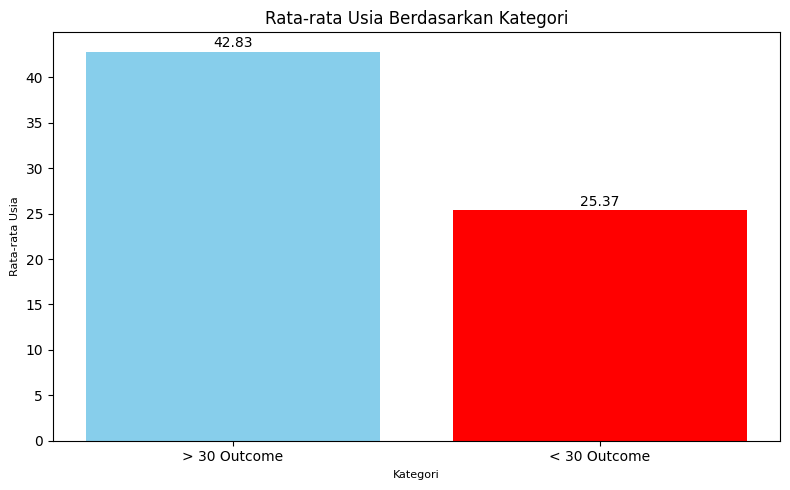

In [10]:
# Data rata-rata dari hasil perhitungan
categories = ['> 30 Outcome', '< 30 Outcome']
means = [rata2_atas30_outcome, rata2_bawah30_outcome]

# Membuat bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, means, color=['skyblue', 'red'])

# Menambahkan judul dan label
plt.title('Rata-rata Usia Berdasarkan Kategori', fontsize=12)
plt.ylabel('Rata-rata Usia', fontsize=8)
plt.xlabel('Kategori', fontsize=8)

# Menampilkan nilai rata-rata pada masing-masing batang
for i, mean in enumerate(means):
    plt.text(i, mean + 0.5, f'{mean:.2f}', ha='center', fontsize=10)

# Tampilkan grafik
plt.tight_layout()
plt.show()

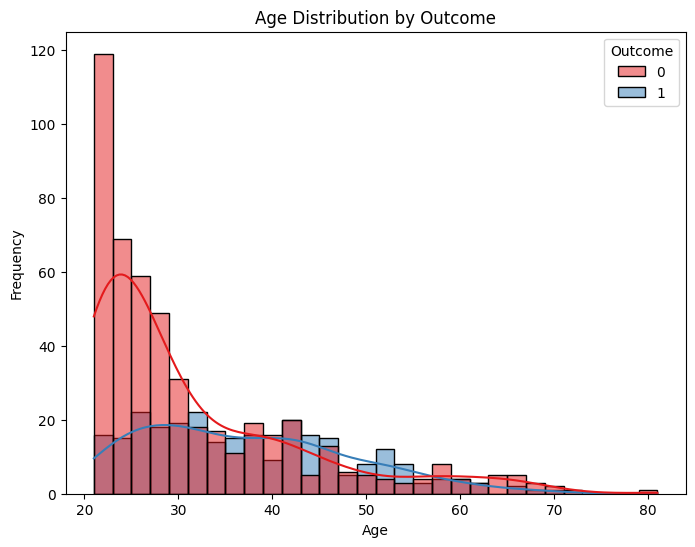

In [11]:
# 3. Distribusi usia for each Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Outcome', kde=True, palette='Set1', bins=30)
plt.title("Age Distribution by Outcome")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25724\1110069836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette='Set3')


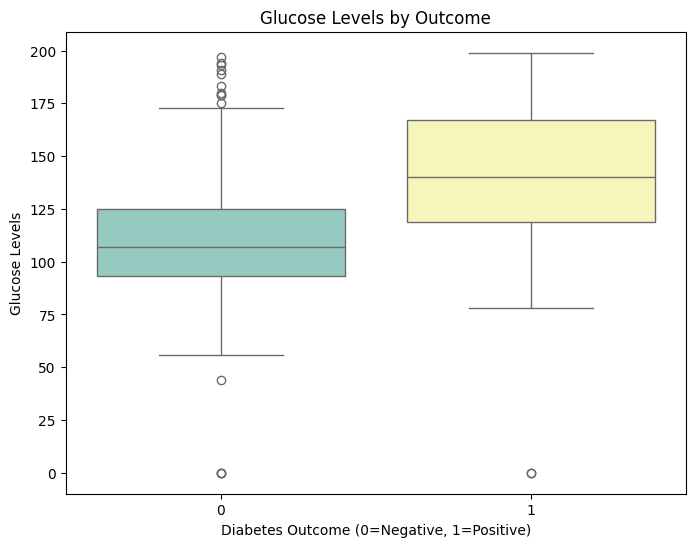

In [12]:
# 4. Level Glukosa berdasarkan Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette='Set3')
plt.title("Glucose Levels by Outcome")
plt.xlabel("Diabetes Outcome (0=Negative, 1=Positive)")
plt.ylabel("Glucose Levels")
plt.show()

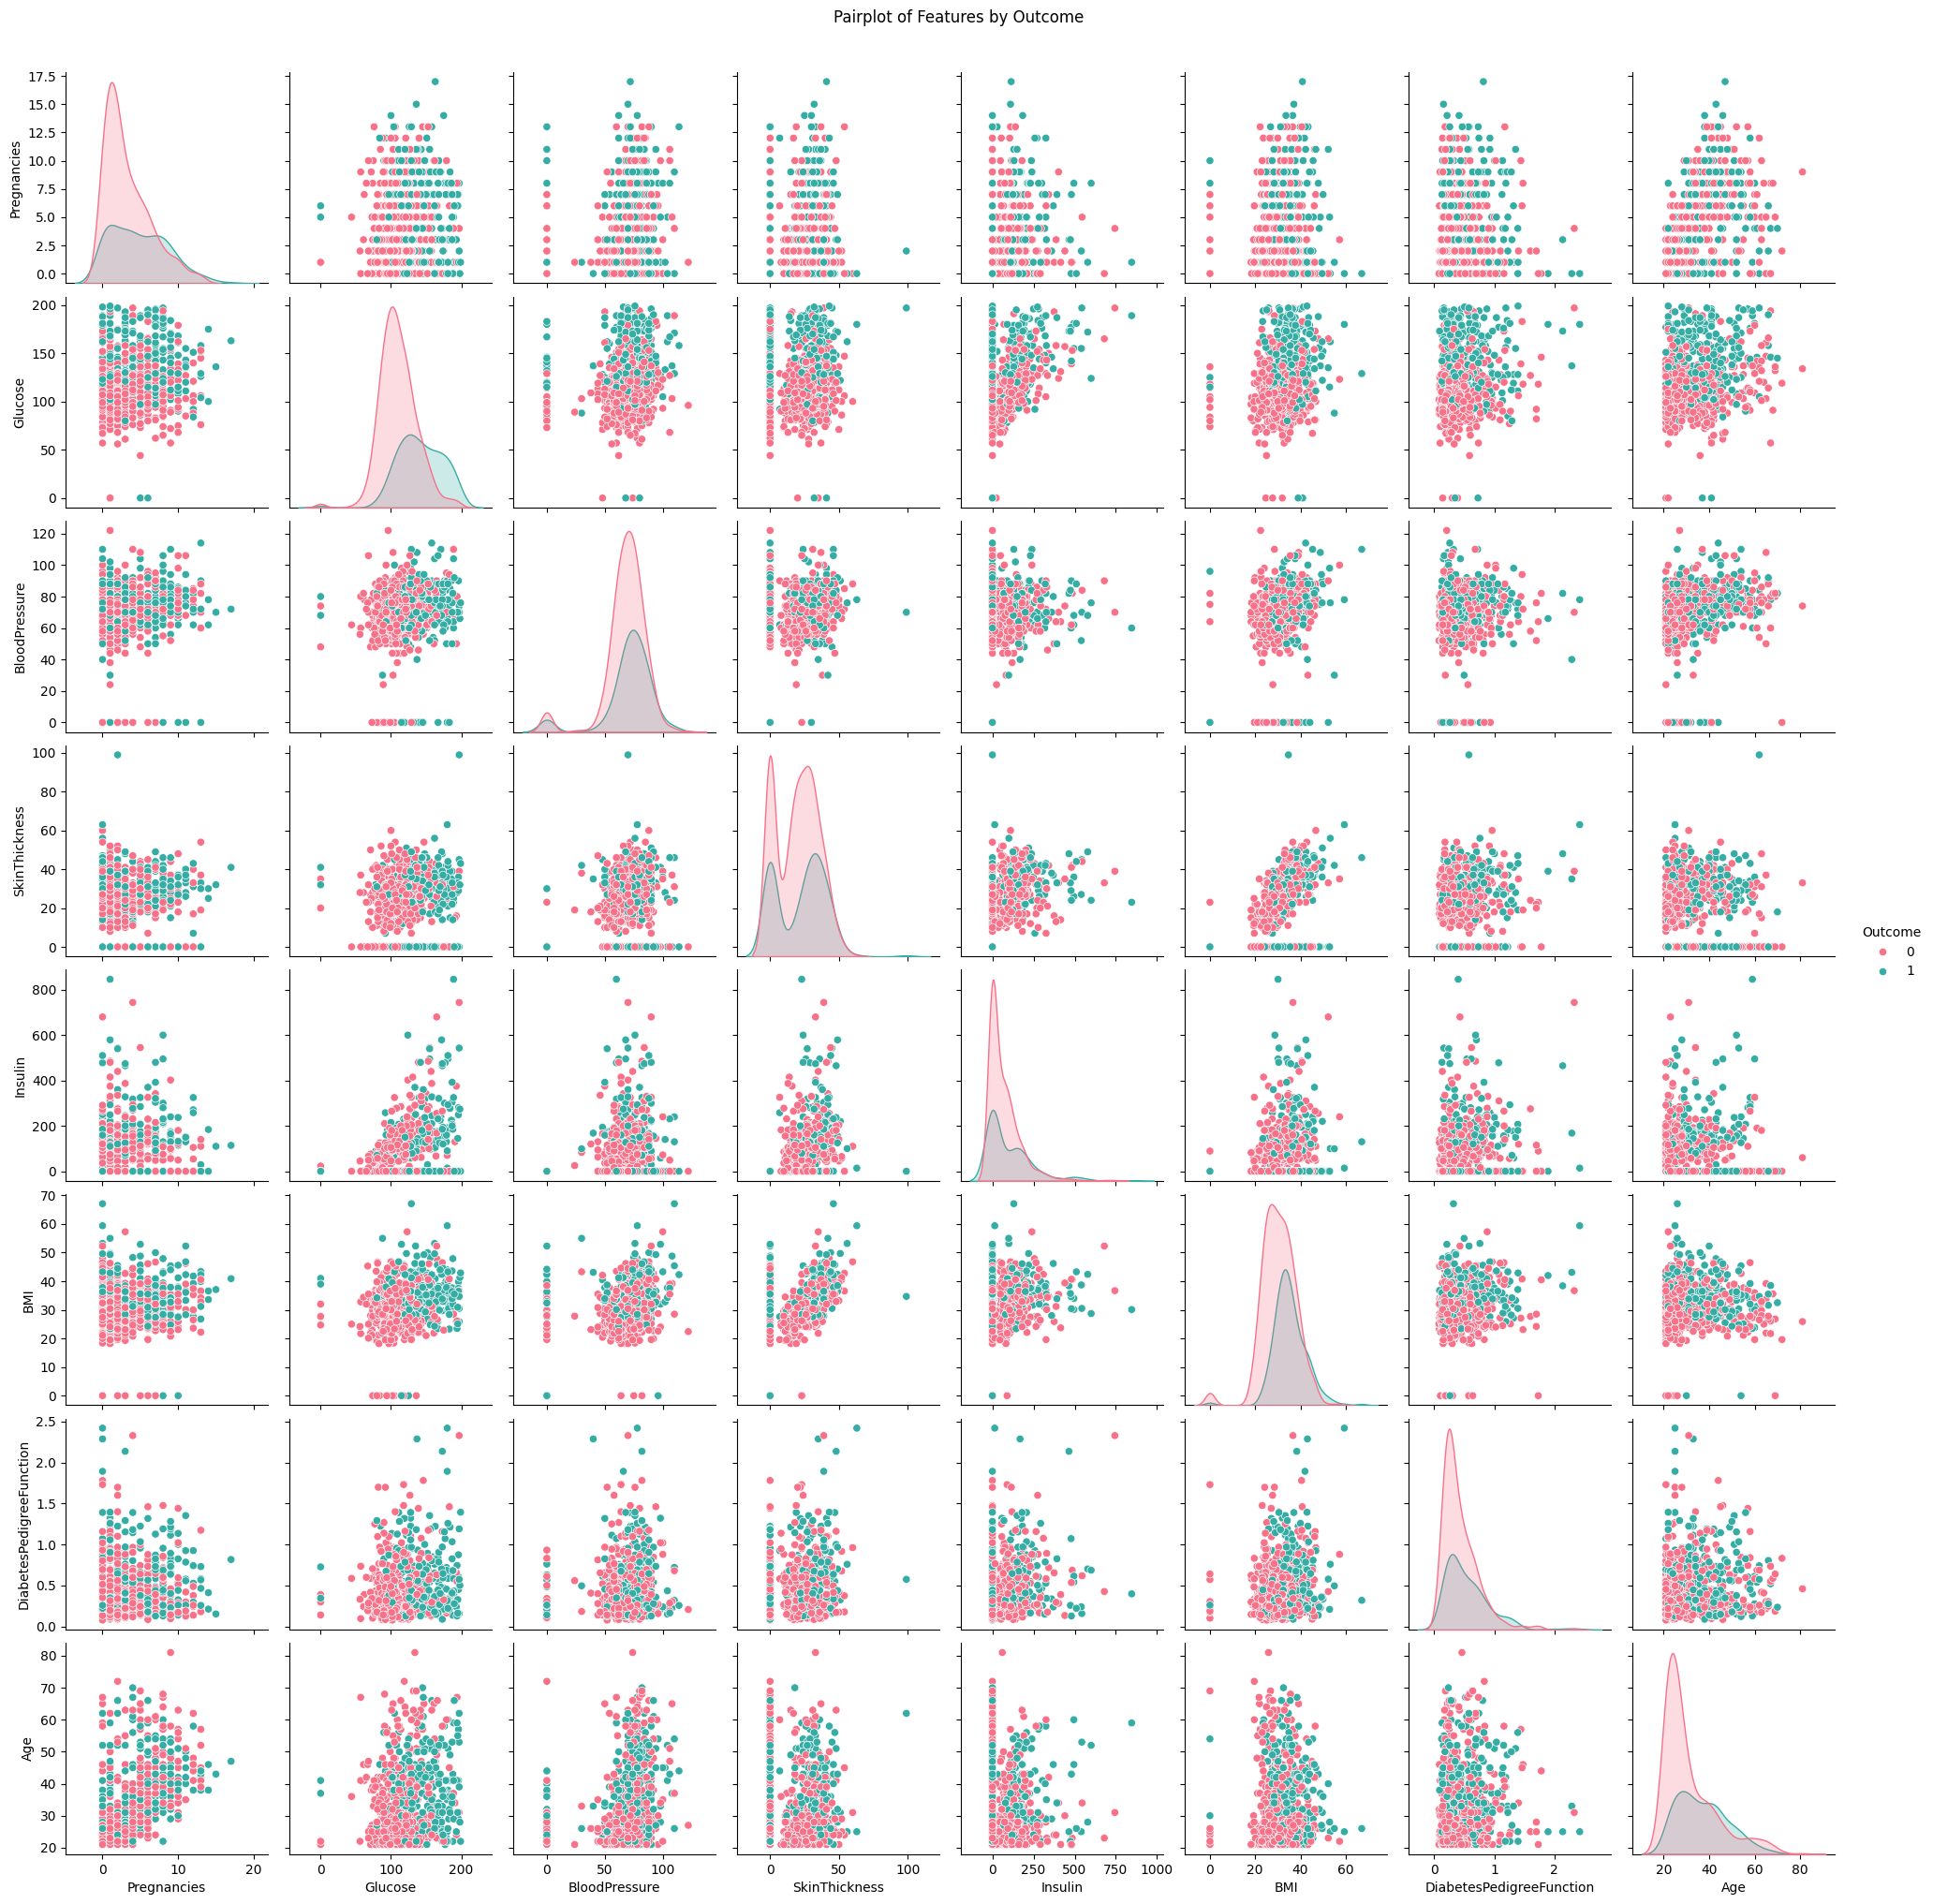

In [13]:
# 5. Pairplot of numerical features by Outcome
sns.pairplot(data, hue='Outcome', palette='husl')
plt.suptitle("Pairplot of Features by Outcome", y=1.02)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25724\3621644434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='BMI', data=data, palette='muted')


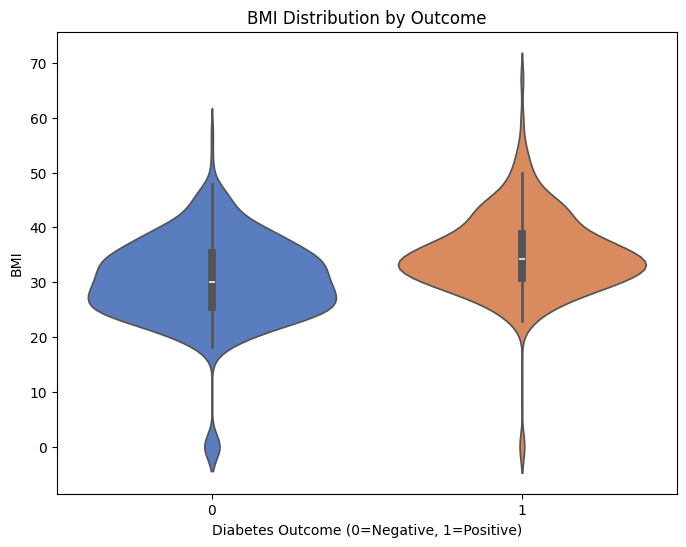

In [14]:
# 6. BMI distribution by Outcome
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='BMI', data=data, palette='muted')
plt.title("BMI Distribution by Outcome")
plt.xlabel("Diabetes Outcome (0=Negative, 1=Positive)")
plt.ylabel("BMI")
plt.show()

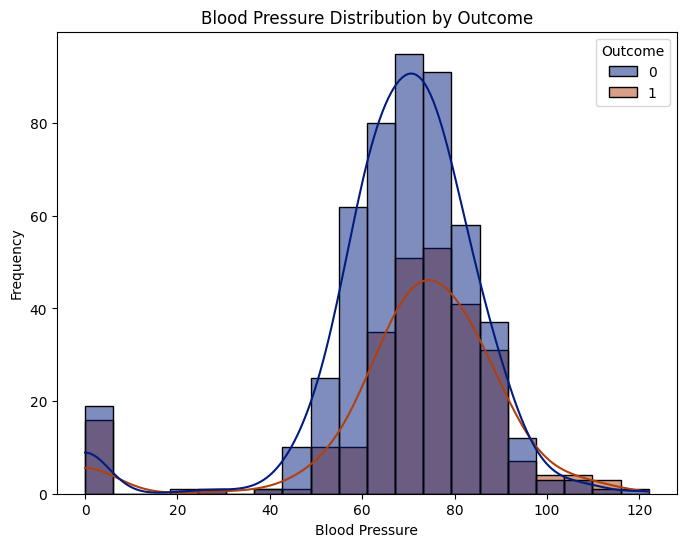

In [15]:
# 7. Blood Pressure distribution by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='BloodPressure', hue='Outcome', kde=True, palette='dark', bins=20)
plt.title("Blood Pressure Distribution by Outcome")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25724\498131789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Insulin', data=data, palette='coolwarm')


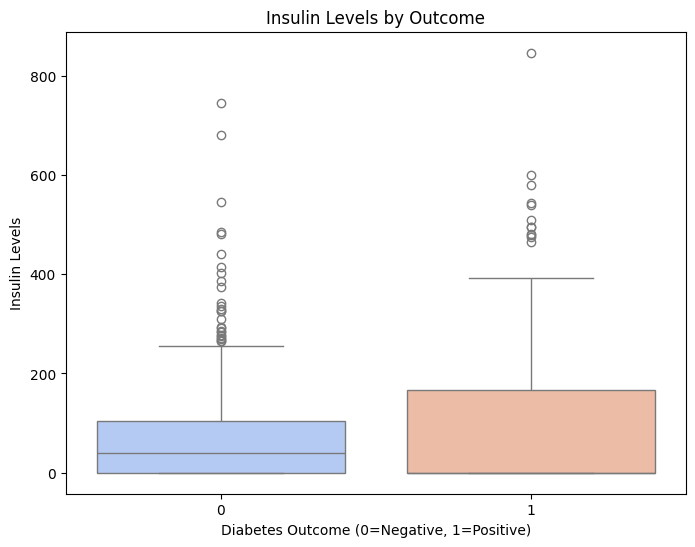

In [16]:
# 8. Insulin levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Insulin', data=data, palette='coolwarm')
plt.title("Insulin Levels by Outcome")
plt.xlabel("Diabetes Outcome (0=Negative, 1=Positive)")
plt.ylabel("Insulin Levels")
plt.show()

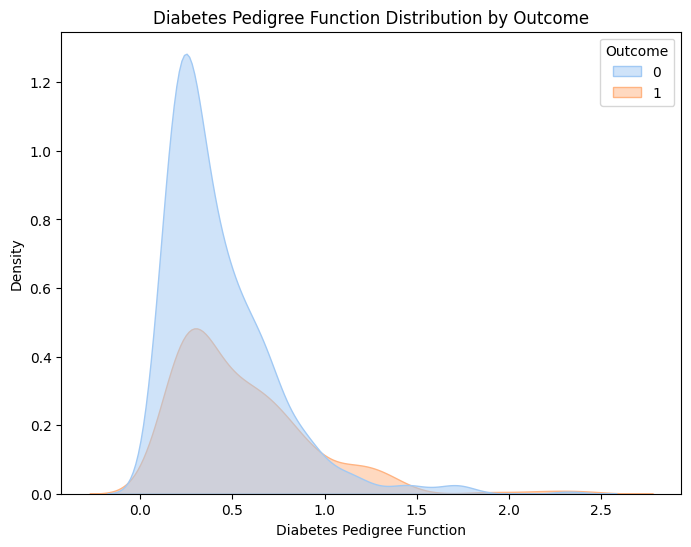

In [17]:
# 9. Distribution of Diabetes Pedigree Function
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='DiabetesPedigreeFunction', hue='Outcome', fill=True, alpha=0.5, palette='pastel')
plt.title("Diabetes Pedigree Function Distribution by Outcome")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Density")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25724\2532356726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Pregnancies', data=data, palette='cool')


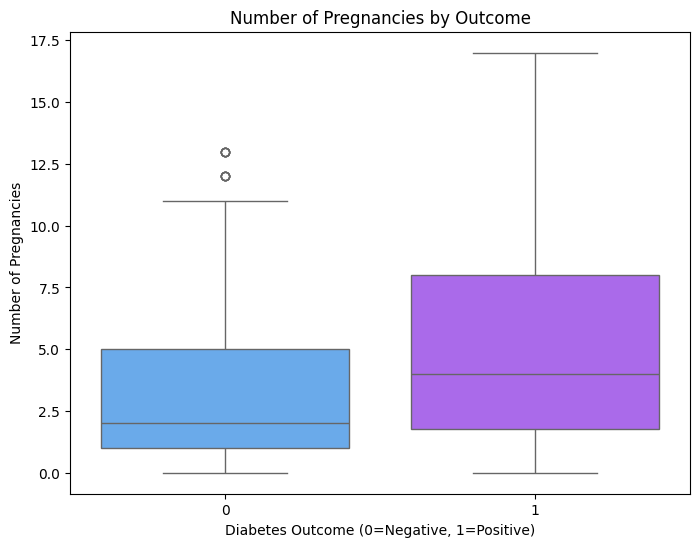

In [18]:
# 10. Pregnancies count by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=data, palette='cool')
plt.title("Number of Pregnancies by Outcome")
plt.xlabel("Diabetes Outcome (0=Negative, 1=Positive)")
plt.ylabel("Number of Pregnancies")
plt.show()

In [19]:
# Mempersiapan Data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# 20% data akan menjadi data uji, dan 80% sisanya akan menjadi data latih.

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Model Regresi Logistik
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Mengevaluasi model regresi logistik
print("Akurasi Regresi Logistik:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Akurasi Regresi Logistik: 0.7532467532467533
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [21]:
# Model SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Mengevaluasi model SVM
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Akurasi SVM: 0.7337662337662337
[[82 17]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [22]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model Decision Tree
print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Akurasi Decision Tree: 0.7207792207792207
[[74 25]
 [18 37]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



In [23]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Random Forest
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Akurasi Random Forest: 0.7467532467532467
[[79 20]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [24]:
# K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model KNN
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Akurasi KNN: 0.6948051948051948
[[79 20]
 [27 28]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



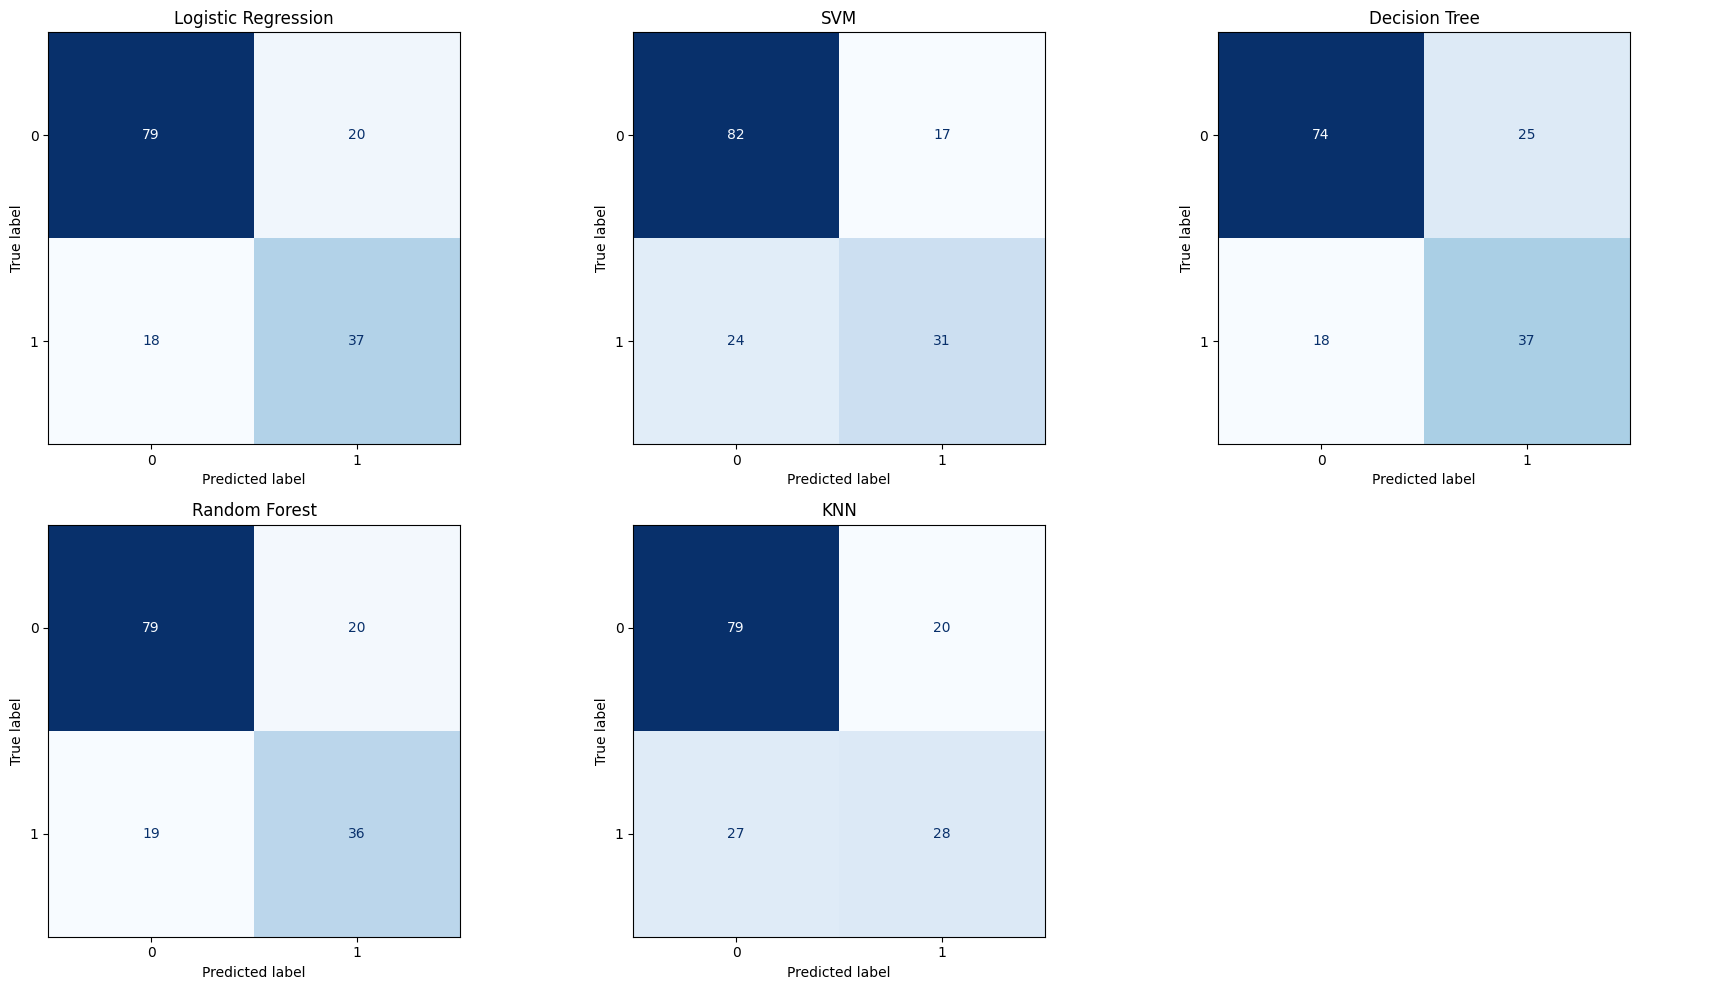

In [25]:
# Visualize Confusion Matrices for all models
models = {
    "Logistic Regression": (log_model, y_pred_log),
    "SVM": (svm_model, y_pred_svm),
    "Decision Tree": (dt_model, y_pred_dt),
    "Random Forest": (rf_model, y_pred_rf),
    "KNN": (knn_model, y_pred_knn),
}

# Create a grid with 3 models in the top row and 2 in the bottom
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, (model, y_pred)) in enumerate(models.items()):
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)

# Hide any unused subplot axes
for j in range(len(models), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()